## Flight Price Prediction (EDA + Feature Engineering)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df=pd.read_excel("C:\\Users\\sande\\Data Sets\\Flight Price Prediction\\Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

In [5]:
test_df=pd.read_excel("C:\\Users\\sande\Data Sets\\Flight Price Prediction\\Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [6]:
test_df.shape

(2671, 10)

In [7]:
final_df=train_df.append(test_df)

In [8]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [9]:
final_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [11]:
#Feature Engineering Process
final_df['Date']=final_df['Date_of_Journey'].str.split('/').str[0]
final_df['Month']=final_df['Date_of_Journey'].str.split('/').str[1]
final_df['Year']=final_df['Date_of_Journey'].str.split('/').str[2]

In [12]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
#Second Method
# final_df['Date']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[0])
# final_df['Month']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[1])
# final_df['Year']=final_df['Date_of_Journey'].apply(lambda x:x.split('/')[2])

In [14]:
final_df['Date']=final_df['Date'].astype(int)
final_df['Month']=final_df['Month'].astype(int)
final_df['Year']=final_df['Year'].astype(int)

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
 11  Date             13354 non-null  int32  
 12  Month            13354 non-null  int32  
 13  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(10)
memory usage: 1.4+ MB


In [16]:
final_df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
Date                  0
Month                 0
Year                  0
dtype: int64

In [17]:
final_df.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
final_df.head(3)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019


In [19]:
final_df['Arrival_Time'].str.split(' ').str[0]

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [20]:
final_df['Arrival_Time'].apply(lambda x:x.split(' ')[0])

0       01:10
1       13:15
2       04:25
3       23:30
4       21:35
        ...  
2666    20:25
2667    16:55
2668    04:25
2669    19:15
2670    19:15
Name: Arrival_Time, Length: 13354, dtype: object

In [21]:
final_df['Arrival_Time']=final_df['Arrival_Time'].str.split(' ').str[0]

In [22]:
final_df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019


In [23]:
final_df['Arrival_Hour']=final_df['Arrival_Time'].str.split(':').str[0]
final_df['Arrival_Minute']=final_df['Arrival_Time'].str.split(':').str[1]


In [24]:
final_df.head(4)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30


In [25]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_Hour     13354 non-null  object 
 14  Arrival_Minute   13354 non-null  object 
dtypes: float64(1), int32(3), object(11)
memory usage: 1.5+ MB


In [26]:
final_df['Arrival_Hour']=final_df['Arrival_Hour'].astype(int)
final_df['Arrival_Minute']=final_df['Arrival_Minute'].astype(int)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
 13  Arrival_Hour     13354 non-null  int32  
 14  Arrival_Minute   13354 non-null  int32  
dtypes: float64(1), int32(5), object(9)
memory usage: 1.4+ MB


In [28]:
final_df.drop('Arrival_Time',axis=1,inplace=True)

In [29]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882.0,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [30]:
final_df['Departure_Hour']=final_df['Dep_Time'].str.split(':').str[0]
final_df['Departure_Minute']=final_df['Dep_Time'].str.split(':').str[1]

In [31]:
final_df['Departure_Hour']=final_df['Departure_Hour'].astype(int)
final_df['Departure_Minute']=final_df['Departure_Minute'].astype(int)


In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Dep_Time          13354 non-null  object 
 5   Duration          13354 non-null  object 
 6   Total_Stops       13353 non-null  object 
 7   Additional_Info   13354 non-null  object 
 8   Price             10683 non-null  float64
 9   Date              13354 non-null  int32  
 10  Month             13354 non-null  int32  
 11  Year              13354 non-null  int32  
 12  Arrival_Hour      13354 non-null  int32  
 13  Arrival_Minute    13354 non-null  int32  
 14  Departure_Hour    13354 non-null  int32  
 15  Departure_Minute  13354 non-null  int32  
dtypes: float64(1), int32(7), object(8)
memory

In [33]:
final_df.drop('Dep_Time',axis=1,inplace=True)

In [34]:
final_df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882.0,9,6,2019,4,25,9,25


In [35]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [36]:
final_df['Total_Stops'].isnull().sum()

1

In [37]:
final_df[final_df['Total_Stops'].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [38]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [39]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13354 non-null  object 
 1   Source            13354 non-null  object 
 2   Destination       13354 non-null  object 
 3   Route             13353 non-null  object 
 4   Duration          13354 non-null  object 
 5   Total_Stops       13353 non-null  float64
 6   Additional_Info   13354 non-null  object 
 7   Price             10683 non-null  float64
 8   Date              13354 non-null  int32  
 9   Month             13354 non-null  int32  
 10  Year              13354 non-null  int32  
 11  Arrival_Hour      13354 non-null  int32  
 12  Arrival_Minute    13354 non-null  int32  
 13  Departure_Hour    13354 non-null  int32  
 14  Departure_Minute  13354 non-null  int32  
dtypes: float64(2), int32(7), object(6)
memory usage: 1.3+ MB


In [40]:
final_df.drop('Route',axis=1,inplace=True)

In [41]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [42]:
final_df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [43]:
final_df['Duration'].str.split(' ').str[0]

0        2h
1        7h
2       19h
3        5h
4        4h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Duration, Length: 13354, dtype: object

In [44]:
final_df['Duration_hour']=final_df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [45]:
final_df[final_df['Duration_hour']=='5m']

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour
6474,Air India,Mumbai,Hyderabad,5m,2.0,No info,17327.0,6,3,2019,16,55,16,50,5m
2660,Air India,Mumbai,Hyderabad,5m,2.0,No info,NaN,12,3,2019,16,55,16,50,5m


In [46]:
final_df.drop(6474,axis=0,inplace=True)
final_df.drop(2660,axis=0,inplace=True)

In [47]:
final_df['Duration_hour']=final_df['Duration_hour'].astype(int)

In [48]:
final_df['Duration_hour']*60

0        120
1        420
2       1140
3        300
4        240
        ... 
2666    1380
2667     120
2668     360
2669     900
2670     840
Name: Duration_hour, Length: 13351, dtype: int32

In [49]:
final_df['Duration'].str.split(' ').str[1]

0       50m
1       25m
2       NaN
3       25m
4       45m
       ... 
2666    55m
2667    35m
2668    35m
2669    15m
2670    20m
Name: Duration, Length: 13351, dtype: object

In [50]:
final_df['Duration_minute']=final_df['Duration'].str.split(' ').str[1].str.split('m').str[0]

In [51]:
final_df['Duration_minute']

0        50
1        25
2       NaN
3        25
4        45
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Duration_minute, Length: 13351, dtype: object

In [52]:
final_df.drop('Duration',axis=1,inplace=True)

In [53]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1,3,2019,21,35,16,50,4,45


In [54]:
final_df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [55]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()

In [56]:
final_df['Airline']=LabelEncoder.fit_transform(final_df['Airline'])

In [57]:
final_df['Source']=LabelEncoder.fit_transform(final_df['Airline'])
final_df['Destination']=LabelEncoder.fit_transform(final_df['Airline'])
final_df['Additional_Info']=LabelEncoder.fit_transform(final_df['Airline'])

In [58]:
final_df.shape

(13351, 15)

In [59]:
final_df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minute
0,3,3,3,0.0,3,3897.0,24,3,2019,1,10,22,20,2,50
1,1,1,1,2.0,1,7662.0,1,5,2019,13,15,5,50,7,25
2,4,4,4,2.0,4,13882.0,9,6,2019,4,25,9,25,19,NaN


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13351 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Airline           13351 non-null  int32  
 1   Source            13351 non-null  int64  
 2   Destination       13351 non-null  int64  
 3   Total_Stops       13350 non-null  float64
 4   Additional_Info   13351 non-null  int64  
 5   Price             10681 non-null  float64
 6   Date              13351 non-null  int32  
 7   Month             13351 non-null  int32  
 8   Year              13351 non-null  int32  
 9   Arrival_Hour      13351 non-null  int32  
 10  Arrival_Minute    13351 non-null  int32  
 11  Departure_Hour    13351 non-null  int32  
 12  Departure_Minute  13351 non-null  int32  
 13  Duration_hour     13351 non-null  int32  
 14  Duration_minute   12068 non-null  object 
dtypes: float64(2), int32(9), int64(3), object(1)
memory usage: 1.2+ MB


In [61]:
pd.get_dummies(final_df,columns=['Airline','Source','Destination','Additional_Info'],drop_first=True)
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minute
0,3,3,3,0.0,3,3897.0,24,3,2019,1,10,22,20,2,50
1,1,1,1,2.0,1,7662.0,1,5,2019,13,15,5,50,7,25
2,4,4,4,2.0,4,13882.0,9,6,2019,4,25,9,25,19,NaN
3,3,3,3,1.0,3,6218.0,12,5,2019,23,30,18,5,5,25
4,3,3,3,1.0,3,13302.0,1,3,2019,21,35,16,50,4,45


In [62]:
# final_df.drop(2,axis=0,inplace=True)

In [63]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_hour,Duration_minute
0,3,3,3,0.0,3,3897.0,24,3,2019,1,10,22,20,2,50
1,1,1,1,2.0,1,7662.0,1,5,2019,13,15,5,50,7,25
2,4,4,4,2.0,4,13882.0,9,6,2019,4,25,9,25,19,NaN
3,3,3,3,1.0,3,6218.0,12,5,2019,23,30,18,5,5,25
4,3,3,3,1.0,3,13302.0,1,3,2019,21,35,16,50,4,45


<AxesSubplot:>

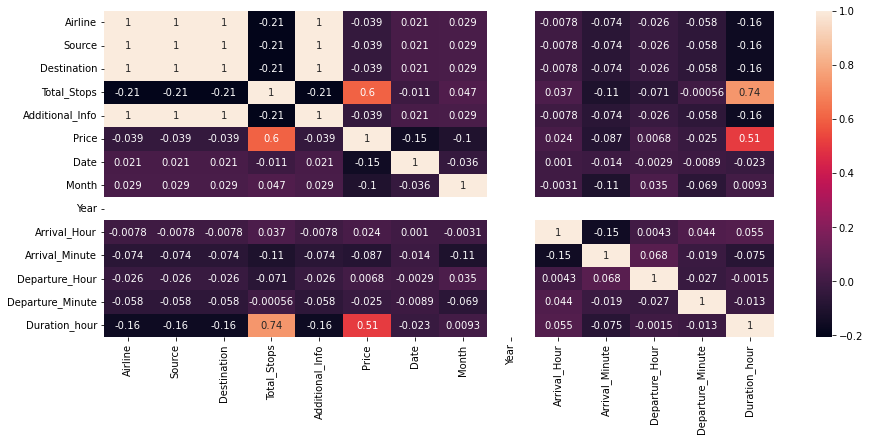

In [64]:
plt.figure(figsize=(15,6))
sns.heatmap(final_df.corr(),annot=True)

In [66]:
final_df.to_excel("Fligh_Price_Prediction(After).xlsx")